In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx


# Loading Dataset

In [2]:
dataset = pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx')

dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Identifying dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
dataset.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


We observe that the values for quantity and unit price include negative numbers, which is illogical. While a negative quantity might indicate a return or devolution, a negative unit price does not make sense.

# Verifying Null Values

In [5]:
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Identifying Unique Values to the Country

In [6]:
dataset["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
dataset.groupby('Country').size().sort_values(ascending=False)

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


Looking at the results, It will be selected the top 3 countries like segments

## Dropping Negative Values in quantity and price 

In [8]:
dataset_filtered=dataset[~((dataset['Quantity']<=0) | (dataset['UnitPrice']<=0))]

In [9]:
dataset_filtered.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


# Selecting segments

In [10]:
#Dropping Columns
new_df = dataset_filtered.drop(columns = ['StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'InvoiceNo'], axis = 1)

In [11]:
new_df.head(30)

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom
2,8,2.75,United Kingdom
3,6,3.39,United Kingdom
4,6,3.39,United Kingdom
5,2,7.65,United Kingdom
6,6,4.25,United Kingdom
7,6,1.85,United Kingdom
8,6,1.85,United Kingdom
9,32,1.69,United Kingdom


In [12]:
#UK Segment
new_df_uk=new_df[new_df["Country"]=="United Kingdom"]



In [13]:
new_df_uk.head(10)

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom
2,8,2.75,United Kingdom
3,6,3.39,United Kingdom
4,6,3.39,United Kingdom
5,2,7.65,United Kingdom
6,6,4.25,United Kingdom
7,6,1.85,United Kingdom
8,6,1.85,United Kingdom
9,32,1.69,United Kingdom


In [14]:
new_df_uk.describe()

,Quantity,UnitPrice
count,485123.000000,485123.000000
mean,9.610738,3.849679
std,161.904143,34.677371
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [15]:
#Germany Segment
new_df_ger = new_df[new_df["Country"]=="Germany"]
new_df_ger.head(10)


,Quantity,UnitPrice,Country
1109,6,2.95,Germany
1110,6,2.55,Germany
1111,12,0.85,Germany
1112,12,1.65,Germany
1113,12,1.95,Germany
1114,12,1.65,Germany
1115,24,0.42,Germany
1116,10,1.95,Germany
1117,10,1.95,Germany
1118,4,4.65,Germany


In [16]:
new_df_ger.describe()

,Quantity,UnitPrice
count,9040.000000,9040.000000
mean,13.192588,3.709308
std,17.641874,13.156619
min,1.000000,0.040000
25%,6.000000,1.250000
50%,10.000000,1.950000
75%,12.000000,3.750000
max,600.000000,599.500000


In [17]:
#Germany Segment
new_df_fra = new_df[new_df["Country"]=="France"]
new_df_fra.head(10)

,Quantity,UnitPrice,Country
26,24,3.75,France
27,24,3.75,France
28,12,3.75,France
29,12,0.85,France
30,24,0.65,France
31,48,0.85,France
32,24,1.25,France
33,18,2.95,France
34,24,2.95,France
35,24,1.95,France


In [18]:
new_df_fra.describe()

,Quantity,UnitPrice
count,8407.000000,8407.000000
mean,13.334483,4.400237
std,21.070786,65.509139
min,1.000000,0.060000
25%,6.000000,1.250000
50%,10.000000,1.790000
75%,12.000000,3.750000
max,912.000000,4161.060000


# Performing K-means to United Kingdom

In [19]:
X = new_df_uk.iloc[:, [0,1]].values
X

array([[ 6.  ,  2.55],
       [ 6.  ,  3.39],
       [ 8.  ,  2.75],
       ...,
       [24.  ,  1.25],
       [24.  ,  8.95],
       [10.  ,  7.08]])

## Using the elbow method to find the optimal number of clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

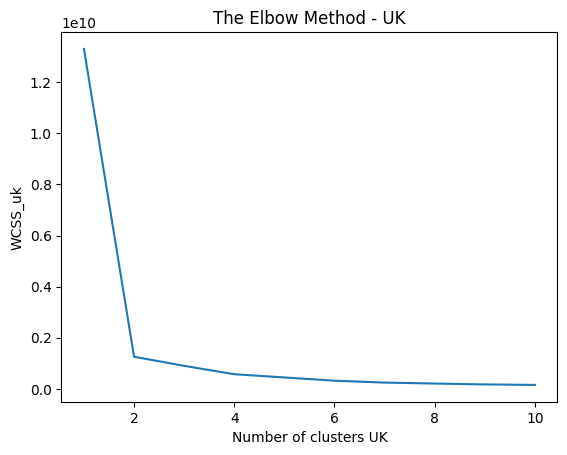

In [20]:
from sklearn.cluster import KMeans
wcss_uk = []
for i in range(1, 11):
    kmeans_uk = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_uk.fit(X)
    wcss_uk.append(kmeans_uk.inertia_)
plt.plot(range(1, 11), wcss_uk)
plt.title('The Elbow Method - UK')
plt.xlabel('Number of clusters UK')
plt.ylabel('WCSS_uk')
plt.show()

## Training the K-Means model on the dataset

In [21]:
kmeans_uk = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_uk = kmeans_uk.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualising the clusters

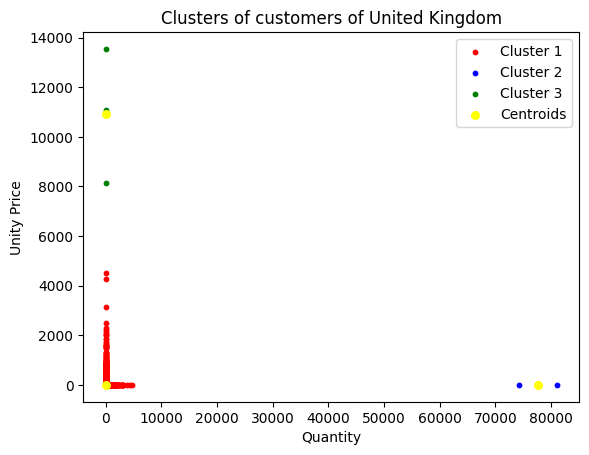

In [22]:
plt.scatter(X[y_kmeans_uk == 0, 0], X[y_kmeans_uk == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_uk == 1, 0], X[y_kmeans_uk == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_uk == 2, 0], X[y_kmeans_uk == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_uk.cluster_centers_[:, 0], kmeans_uk.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers of United Kingdom')
plt.xlabel('Quantity')
plt.ylabel('Unity Price')
plt.legend()
plt.show()

Three segments have been identified:

* **Low prices with low quantities:**
    Prices: between 0.001 and 4130
    Quantities: between 1 and 6000
    
* **High prices with low quantities:**
    Prices: between 8000 and 13541
    Quantities: close to 1
    
* **Very low prices with high quantities:**
    Prices: close to 1
    Quantities: between 73000 and 80995

# Performing K-means to Germany

In [23]:
X1 = new_df_ger.iloc[:, [0,1]].values
X1

array([[ 6.  ,  2.95],
       [ 6.  ,  2.55],
       [12.  ,  0.85],
       ...,
       [12.  ,  0.85],
       [12.  ,  2.08],
       [10.  ,  1.65]])

## Using the elbow method to find the optimal number of clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

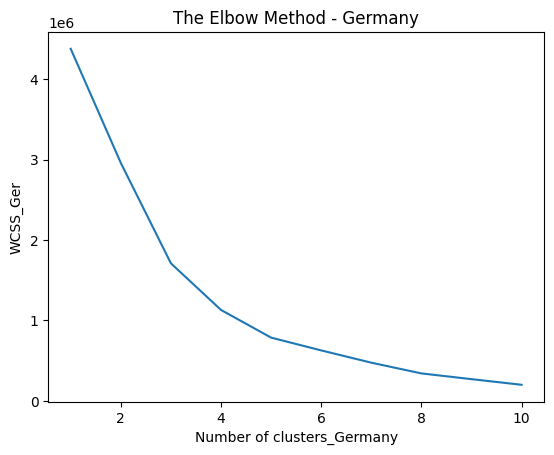

In [24]:
from sklearn.cluster import KMeans
wcss_ger = []
for i in range(1, 11):
    kmeans_ger = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_ger.fit(X1)
    wcss_ger.append(kmeans_ger.inertia_)
plt.plot(range(1, 11), wcss_ger)
plt.title('The Elbow Method - Germany')
plt.xlabel('Number of clusters_Germany')
plt.ylabel('WCSS_Ger')
plt.show()

## Training the K-Means model on the dataset

In [25]:
kmeans_ger = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_ger = kmeans_ger.fit_predict(X1)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualising the clusters

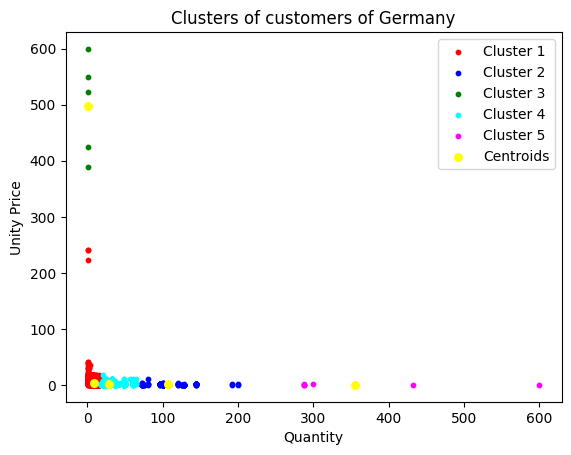

In [26]:
plt.scatter(X1[y_kmeans_ger == 0, 0], X1[y_kmeans_ger == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans_ger == 1, 0], X1[y_kmeans_ger == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans_ger == 2, 0], X1[y_kmeans_ger == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans_ger == 3, 0], X1[y_kmeans_ger == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X1[y_kmeans_ger == 4, 0], X1[y_kmeans_ger == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans_ger.cluster_centers_[:, 0], kmeans_ger.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers of Germany')
plt.xlabel('Quantity')
plt.ylabel('Unity Price')
plt.legend()
plt.show()

Four segments have been identified:

* **Low prices with low quantities:**
    Prices: between 0.04 and 250
    Quantities: between 1 and 20
    
* **High prices with low quantities:**
    Prices: between 380 and 599,5
    Quantities: close to 1
    
* **Low prices with middle-low quantities:**
    Prices: between 0.04 and 20
    Quantities: between 20 and 60
    
* **Low prices with middle quantities:**
    Prices: between 0.04 and 10
    Quantities: between 60 and 200
    
* **Low prices with high quantities:**
    Prices: close 0.04 
    Quantities: between 290 and 600

# Performing K-means to France

In [27]:
X2 = new_df_fra.iloc[:, [0,1]].values
X2

array([[24.  ,  3.75],
       [24.  ,  3.75],
       [12.  ,  3.75],
       ...,
       [ 4.  ,  4.15],
       [ 4.  ,  4.15],
       [ 3.  ,  4.95]])

## Using the elbow method to find the optimal number of clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

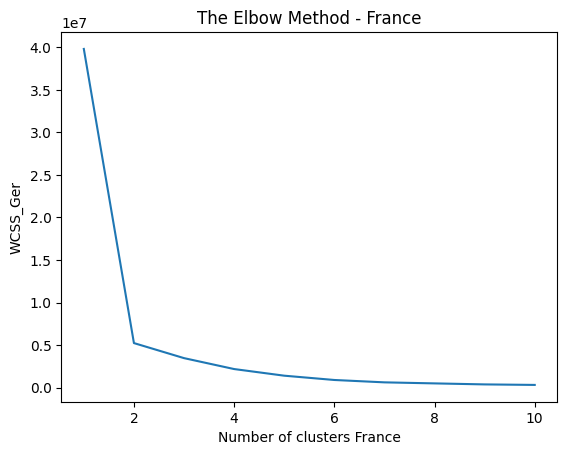

In [28]:
from sklearn.cluster import KMeans
wcss_fra = []
for i in range(1, 11):
    kmeans_fra = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_fra.fit(X2)
    wcss_fra.append(kmeans_fra.inertia_)
plt.plot(range(1, 11), wcss_fra)
plt.title('The Elbow Method - France')
plt.xlabel('Number of clusters France')
plt.ylabel('WCSS_Ger')
plt.show()

## Training the K-Means model on the dataset

In [29]:
kmeans_fra = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_fra = kmeans_fra.fit_predict(X2)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualising the clusters

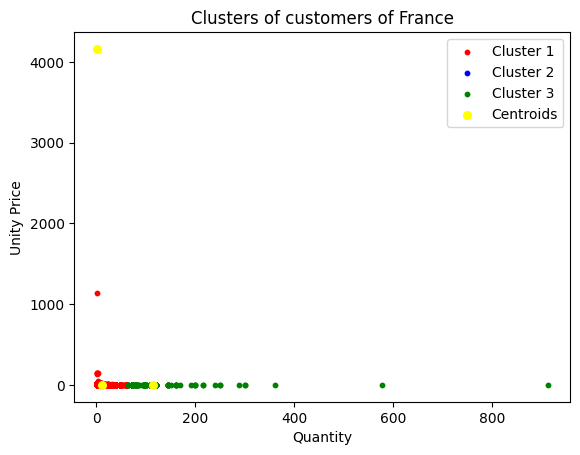

In [30]:
plt.scatter(X2[y_kmeans_fra == 0, 0], X2[y_kmeans_fra == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans_fra == 1, 0], X2[y_kmeans_fra == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans_fra == 2, 0], X2[y_kmeans_fra == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X1[y_kmeans_ger == 3, 0], X1[y_kmeans_ger == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X1[y_kmeans_ger == 4, 0], X1[y_kmeans_ger == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans_fra.cluster_centers_[:, 0], kmeans_fra.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers of France')
plt.xlabel('Quantity')
plt.ylabel('Unity Price')
plt.legend()
plt.show()

Three segments have been identified:

* **Low prices with low quantities:**
    Prices: between 0.06 and 1100
    Quantities: between 1 and 50
    
* **High prices with low quantities:**
    Prices: around 4161
    Quantities: close to 1
    
* **Low prices with high quantities:**
    Prices: close to 1
    Quantities: between 40 and 912